# Ready, Steady, Go AI (*Tutorial*)

This tutorial is a supplement to the paper, **Ready, Steady, Go AI: A Practical Tutorial on Fundamentals of Artificial Intelligence and Its Applications in Phenomics Image Analysis** (*Patterns, 2021*) by Farid Nakhle and Antoine Harfouche

Read the accompanying paper [here](https://doi.org/10.1016/j.patter.2021.100323).

# Table of contents


* **1. Background**
* **2. Downloading Annotated Images**
* **3. Training SegNet**
* **4. Downloading The Cropped Dataset**
* **5. Segmenting Images**

# 1. Background


**Why do we need to segment?**

Datasets will sometimes include images that depict more than one object, typically belonging to background objects that are not of interest for an AI algorithm to learn. This could negatively affect its training and can be solved by segmenting images, keeping only the leaf. However, this process can take a considerable amount of time and effort. We show how segmenting can be automated using the SegNet algorithm

**What is SegNet?**

Image segmentation is the process of assigning each pixel in an image a certain class in order to improve the accuracy of ML and DL-based image analysis. 


SegNet, developed by members of the Computer Vision and Robotics Group at the University of Cambridge, UK, is a DCNN-based algorithm used for pixel-wise image segmentation. Based on the visual geometry group (VGG)-16 architecture, SegNet consists of an encoder network of 13 convolutional layers and their corresponding decoders, followed by a classification layer. 

In this tutorial, 150 images, chosen randomly from the 10 tomato classes of PlantVillage, were annotated with segmentation masks using the computer vision annotation tool (https://cvat.org) in order to train SegNet on leaf segmentation.

We will use the output model to segment the rest of the images in the dataset.


# 2. Downloading Annotated Images


As a reminder, we are working with the PlantVillage dataset, originally obtained from [here](http://dx.doi.org/10.17632/tywbtsjrjv.1).
For this tutorial, we will be working with a subset of PlantVillage, where we will choose the tomato classes only. We have made the subset available [here](http://dx.doi.org/10.17632/4g7k9wptyd.1). 

The next code will automatically download 150 images, specifically annotated to train SegNet.

**It is important to note that Colab deletes all unsaved data once the instance is recycled. Therefore, remember to download your results once you run the code.**

In [ ]:
import requests
import os
import zipfile

## FEEL FREE TO CHANGE THESE PARAMETERS
dataset_url = "http://faridnakhle.com/pv/tomato-SegNet-annotations.zip"
save_data_to = "/content/dataset/SegNet_Training"
dataset_file_name = "SegNet.zip"
#######################################

if not os.path.exists(save_data_to):
    os.makedirs(save_data_to)

r = requests.get(dataset_url, stream = True, headers={"User-Agent": "Ready, Steady, Go AI"})

print("Downloading dataset...")  

with open(save_data_to + dataset_file_name, "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

## Extract downloaded zip dataset file
print("Dataset downloaded")  
print("Extracting files...")  
with zipfile.ZipFile(save_data_to + dataset_file_name, 'r') as zip_dataset:
    zip_dataset.extractall(save_data_to)

## Delete the zip file as we no longer need it
os.remove(save_data_to + dataset_file_name)
print("All done!")  


Dataset downloaded
Extracting files...
All done!


# 3. Training SegNet

Our code will be based on the SegNet implementation of image-segmentation-keras, open source and freely available for redistribution under the [MIT license](https://choosealicense.com/licenses/mit/). 
For more information please visit https://github.com/divamgupta/image-segmentation-keras.

In [ ]:
## CLONE THEIR REPO and install all pre-requisites
!git clone https://github.com/divamgupta/image-segmentation-keras
%cd image-segmentation-keras

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1160 (delta 12), reused 22 (delta 8), pack-reused 1132
Receiving objects: 100% (1160/1160), 3.29 MiB | 34.07 MiB/s, done.
Resolving deltas: 100% (739/739), done.
/content/image-segmentation-keras


Next, we will import Keras Software Framework. It is recommended to use a GPU instance for faster training. By default, this notebook runs on GPU. If you would like to change the instance type, check Colab docs [here](https://colab.research.google.com/notebooks/gpu.ipynb).

In [ ]:
from keras_segmentation.models.segnet import segnet
print("Keras and SegNet are loaded")

Keras and SegNet are loaded


In [ ]:
train_imgs = "/content/dataset/SegNet_Training/images/"
train_annots = "/content/dataset/SegNet_Training/labels/"

**NB: To make running this notebook faster and our results easily reproducable, we made our trained model available and we will load it after this section. Thus, you might skip this next code block**

In [ ]:
!mkdir checkpoints

model = segnet(n_classes=50,  input_height=224, input_width=224)
model.train(
    train_images =  train_imgs,
    train_annotations = train_annots,
    checkpoints_path = "./checkpoints" , epochs=100
)

The best generated model is now saved /content/yolov3/runs/expX/weights/best.pt
where X in expX represents the experiment number (how many times the code was run).

**In the next section, we will load our trained model to make our results reproducable. You can change the loading path to use your own instead**

In [ ]:
##########################
### DOWNLOAD THE MODEL ###
##########################

## FEEL FREE TO CHANGE THESE PARAMETERS
model_URL = "http://faridnakhle.com/pv/models/SegNet.zip"
save_data_to = "/content/models/"
model_file_name = "segnet.zip"
#######################################

if not os.path.exists(save_data_to):
    os.makedirs(save_data_to)

print("Downloading model...")  

r = requests.get(model_URL, stream = True, headers={"User-Agent": "Ready, Steady, Go AI"})
with open(save_data_to + model_file_name, "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

## Extract downloaded zip dataset file
print("Model downloaded")  
print("Extracting files...")

with zipfile.ZipFile(save_data_to + model_file_name, 'r') as zip_dataset:
    zip_dataset.extractall(save_data_to)
print("All done!")  


Model downloaded
Extracting files...
All done!


In [ ]:
modelName = "/content/models/RSGAI_SegNet.hdf5"
model = segnet(n_classes=50 ,  input_height=320, input_width=640)
model.load_weights(modelName)

# 4. Downloading The Cropped Dataset

In [ ]:
import requests
import os
import zipfile

## FEEL FREE TO CHANGE THESE PARAMETERS
dataset_url = "http://faridnakhle.com/pv/tomato-split-cropped.zip"
save_data_to = "/content/dataset/tomato-cropped/"
dataset_file_name = "tomato-cropped.zip"
#######################################

if not os.path.exists(save_data_to):
    os.makedirs(save_data_to)

r = requests.get(dataset_url, stream = True, headers={"User-Agent": "Ready, Steady, Go AI"})

print("Downloading dataset...")  

with open(save_data_to + dataset_file_name, "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

## Extract downloaded zip dataset file
print("Dataset downloaded")  
print("Extracting files...")  
with zipfile.ZipFile(save_data_to + dataset_file_name, 'r') as zip_dataset:
    zip_dataset.extractall(save_data_to)

## Delete the zip file as we no longer need it
os.remove(save_data_to + dataset_file_name)
print("All done!")  

Dataset downloaded
Extracting files...
All done!


# 5. Segmenting Images

Next, we will write a custom segmentation function that uses the trained model to segment all of our dataset.

In [ ]:
import cv2
import numpy as np
from keras_segmentation.models.segnet import segnet
import glob
import os
from tqdm import tqdm
import six

inptDir = "/content/dataset/tomato-cropped/"
outputDir = "/content/dataset/tomato-cropped-segmented/"

inptDirGlob = glob.glob(inptDir + "*")
for setDir in inptDirGlob:

  splitDir = os.path.basename(setDir)
  setClasses = glob.glob(setDir + "/*")

  for setClass in setClasses:

    classDir = os.path.basename(setClass)
    inptFolder = os.path.join(inptDir, splitDir, classDir)
    outputFolder = os.path.join(outputDir, splitDir, classDir)

    if not os.path.exists(outputFolder):
        os.makedirs(outputFolder)

    inps = glob.glob(os.path.join(inptFolder, "*.jpg")) + glob.glob(
        os.path.join(inptFolder, "*.png")) + \
        glob.glob(os.path.join(inptFolder, "*.jpeg"))+ \
        glob.glob(os.path.join(inptFolder, "*.JPG"))
    inps = sorted(inps)

    if len(inps) > 0:

      all_prs = []

      for i, inp in enumerate(tqdm(inps)):
          if outputFolder is None:
              out_fname = None
          else:
              if isinstance(inp, six.string_types):
                  out_fname = os.path.join(outputFolder, os.path.basename(inp))
              else:
                  out_fname = os.path.join(outputFolder, str(i) + ".jpg")

          pr = model.predict_segmentation(
              inp=inp,
              out_fname=out_fname
          )

          img = cv2.imread(inp)
          seg = cv2.imread(out_fname)

          for row in range(0, len(seg)):
              for col in range(0, len(seg[0])):
                  #if np.all(seg[row, col] == [7,47,204]) == False:
                  #    img[row, col] = [0,0,0]
                  
                  if seg[row, col][0] > 50:
                      img[row, col] = [0,0,0]
          all_prs.append(pr)
          cv2.imwrite(out_fname, img)

Now that all images are segmented, we can take a look at a preview

Original Image:


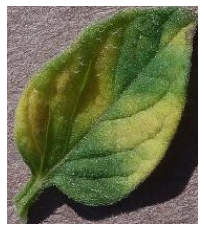

Segmented Image:


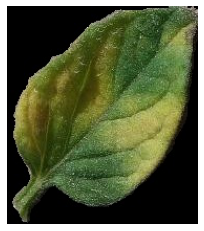

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgPath = '/content/dataset/tomato-cropped/train/Tomato___Leaf_Mold/image (1)_cropped_1.JPG'
segmemtedPath = '/content/dataset/tomato-cropped-segmented/train/Tomato___Leaf_Mold/image (1)_cropped_1.JPG'

oringinalImg = mpimg.imread(imgPath)
segmentedImage = mpimg.imread(segmemtedPath)

print("Original Image:")
plt.axis('off')
plt.imshow(oringinalImg)
plt.show()

print("Segmented Image:")
plt.axis('off')
plt.imshow(segmentedImage)
plt.show()